## Project 3: Diagnostic Classification System
- 03 Preprocessing and Modeling

#### Content
> * [Background](#Background)
> * [Problem Statement](#Problem-Statement) 
> * [Web Scraping and Data Cleaning](#Web-Scraping-And-Data-Cleaning)
> * [Exploratory Data Analysis](#Exploratory-Data-Analysis)
> * [Preprocessing and Modeling](#Preprocessing-And-Modeling)
> * [Baseline Model Performance Evaluation](#Baseline-Model-Performance-Evaluation)
> * [Evaluation and Conceptual Understanding](#Evaluation-And-Understanding)
> * [Conclusion and Recommendations](#Conclusion-And-Recommendations)

---
<a id='Background'></a>
### Background

Research has shown that gifted children can exhibit some of the same behaviours as those on the autism spectrum. Social quirkiness is normal in bright kids as well as in those with autism. Like kids on the spectrum, gifted kids also have keen memories and a good grip on language. They can also get lost in their imaginations or think logically and critically to the extent that imagination seems far away. Both groups can also find it difficult to manage social interactions with their peers. 

At the same time, these are broad generalisations of behaviours. Once you dive deeper, you can see there are some salient differences. For example, a gifted child may present an extensive and advanced vocabulary with a rich verbal style. A child on the autism spectrum may have an advanced use of vocabulary, but they may not have full comprehension of the language they use. They may also have a less inviting verbal style that lacks the engagement of others. By extension, these differences can cause students with aspergers to have learning styles and needs that deviate from those of gifted students. 

Studies have shown that it may be possible to distinguish children on the autism spectrum from gifted children by examining their use of language. This forms the basis of Project 3. This project will address convergent and divergent aspects in communication & language between individuals with aspergers and gifted individuals.

Citations: 
- Tai, J., & Goy, P. (2021). Study: 1 in 150 Children in Singapore Has Autism. The Straits Times.
- Chen, L., Abrams, D. A., Rosenberg-Lee, M., Iuculano, T., Wakeman, H. N., Prathap, S., Chen, T., & Menon, V. (2019). Quantitative analysis of heterogeneity in academic achievement of children with autism. Clinical psychological science : a journal of the Association for Psychological Science, 7(2), 362–380. 
- Lim, P. (2018). "Specific Language Impairment in Children with High-Functioning Autism Spectrum Disorder." Inquiries Journal, 10(05).
- Aggarwal, R., Ringold, S., Khanna, D., Neogi, T., Johnson, S. R., Miller, A., Brunner, H. I., Ogawa, R., Felson, D., Ogdie, A., Aletaha, D., & Feldman, B. M. (2015). Distinctions between diagnostic and classification criteria?. Arthritis care & research, 67(7), 891–897. 
- Minshew, N. J., Goldstein, G., & Siegel, D. J. (1995). Speech and language in high-functioning autistic individuals. Neuropsychology, 9(2), 255–261.

---
<a id='Problem-Statement'></a>
### Problem Statement

Context: The provision of healthcare in Singapore has become more challenging due to a couple of reasons.
1. Shifts in the nature of diseases highlights the system’s shortfall in managing complex chronic diseases
2. Evolution of healthcare consumer expectations
3. Manpower shortage in public hospitals to service the burgeoning aged population
4. Poor design of systems and operational inefficiencies lead to significant waste in Healthcare

Healthcare waste is incurred any time a patient, doctor, or healthcare worker engages in unnecessary medical activity - ranging from preventable mistakes in medical care, to misdiagnoses, provision of unnecessary treatments, and procedural inconsistencies. Research has shown that up to 20% of all healthcare resource expenditures are quality-associated waste and this can amount to a staggering sum. 

In Singapore, part of the costs (and risks) are borne by individuals and families, while part of the costs (and risks) are accounted for by the State - borne by taxpayers, and/or private health insurers. To eliminate waste, the Singapore government has come to incorporate technology into various care models to overcome the various cost- and quality-based challenges in the Healthcare sector. Most of these technologies are procured from private healthtech companies and start-ups. 

Citations: 
- Ooi, Low & Koh, Gerald & Tan, Lawrence & Yap, Jason & Chew, Samuel & Jih, Chin & Fung, Daniel & Sing, Lee & Lee, Patricia & Boon, Lim & Lim, Ruth & Low, James & Sachdev, Ravinder & Seah, Daren & Yeng, Siaw & Chiu, Tan & Teo, David & Tiwari, Satyaprakash & Tym, Wong & Scott, Richard. (2015). National Telemedicine Guidelines of Singapore.
- Nakhooda, F. (2021). The Bottom Line (Healthcare): Cutting Healthcare Waste: A Win-Win for Providers, Payers, Patients. The Business Times, Opinion & Features. 
- Khalik, S. (2018). Experts Highlight Prevalence and Cost of Waste in Healthcare Expenditure. The Straits Times. 

---
### Task
- What other diagnostic criteria can we extract using NLP-models to diagnose autistic and gifted children accurately?

You work in the Research and Development (R&D) of a healthtech startup in Singapore. The company has been enlisted by the Ministry of Health Holdings (MOHH) to create a simple diagnostic tool to rule out specific conditions and dieseases. After the development of a differential diagnosis, this tool will be a core feature in the series of additional tests that will conducted by healthcare professionals to rule out either autism or giftedness. Healthcare professionals will be able to come to a final diagnosis that is more accurate/precise, reducing the likelihood of misdiagnosis produced by the exisiting slew of subjective tests.

---
<a id='Preprocessing-And-Modeling'></a>
### Preprocessing and Modeling

When dealing with text data, there are common pre-processing steps.
1. Remove capitalisation 
2. Remove special / non-roman characters 
3. Remove newlines 
4. Remove punctuation 
5. Lemmatizing/Stemming 
6. Tokenizing 
7. Stop word removal i.e., standard stopwords, additional list stopwords derived from EDA/cvec that you would like to remove
8. Add text_features of importance i.e., bigrams, trigrams 

Note: Additional pre-processing steps such as removing links, username, numbers, double spacing etc. can be performed if time permits.

Load Packages.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from collections import Counter

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Import Data.

In [3]:
# import df
df = pd.read_csv('../data/df.csv', low_memory=False)

1. Engineer a feature 'diagnosis' into a 1/0 column, where 1 indicates Asperger's and 0 indicates Giftedness.

In [4]:
len(df)

1915

In [5]:
df.columns

Index(['text_feature', 'diagnosis'], dtype='object')

In [6]:
# remove capitalisation
# remove punctuation
# remove non-roman characters
# remove new lines 
import re
import string
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    # remove new lines from the text
    text = text.replace('\n', '')
    
    return text
df["text_clean"] = df["text_feature"].map(lambda x: clean_text(x))

Stopword removal. Add stopwords derived from EDA. 

In [7]:
# print English stopwords that have been filtered out previously. 
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# call up list of stopwords
stop_words = set(stopwords.words("english"))

In [9]:
# create a new column name corpus
df['no_stop_words'] = ' '

In [10]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['no_stop_words'] = df['text_clean'].apply(lambda x: [word for word in x.split() if word not in (stop_words)])

In [11]:
df.head(3)

,text_feature,diagnosis,text_clean,no_stop_words
0,"How's your week going so far? Weekly post #264 [Here's last week's thread](https://old.reddit.com/r/aspergers/comments/11g6v1j/hows_your_week_going_so_far_weekly_post_263/)\n\nSuggestions are ALWAYS welcome on how to improve the threads I post at any time. After all, I do this because the community wants these threads to exist, and I take the time out of my day (every Thursday and Saturday) to post the weekly threads, to ensure the community gets what it feels it needs.\n\n**So, continuing with the theme... /r/aspergers, How is your week going so far?** :)",1,hows your week going so far weekly post 264 heres last weeks threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions are always welcome on how to improve the threads i post at any time after all i do this because the community wants these threads to exist and i take the time out of my day every thursday and saturday to post the weekly threads to ensure the community gets what it feels it needsso continuing with the theme raspergers how is your week going so far,"[hows, week, going, far, weekly, post, 264, heres, last, weeks, threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions, always, welcome, improve, threads, post, time, community, wants, threads, exist, take, time, day, every, thursday, saturday, post, weekly, threads, ensure, community, gets, feels, needsso, continuing, theme, raspergers, week, going, far]"
1,"Solitude Project Saturday: What projects are you working on that pertain to your (special) interests? Weekly post #264 [Here's last week's Solitude Project Saturday](https://old.reddit.com/r/aspergers/comments/11i5qdt/solitude_project_saturday_what_projects_are_you/)\n\n**So, /r/aspergers, what projects do you have on the go right now? Any ideas on the backburner for one reason or another? Any ideas just in the planning phase?** Even if you are working on them with someone else, they still apply here. If you can mention the interest that you have that relates to the project, that would be great; it may help others.",1,solitude project saturday what projects are you working on that pertain to your special interests weekly post 264 heres last weeks solitude project saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso raspergers what projects do you have on the go right now any ideas on the backburner for one reason or another any ideas just in the planning phase even if you are working on them with someone else they still apply here if you can mention the interest that you have that relates to the project that would be great it may help others,"[solitude, project, saturday, projects, working, pertain, special, interests, weekly, post, 264, heres, last, weeks, solitude, project, saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso, raspergers, projects, go, right, ideas, backburner, one, reason, another, ideas, planning, phase, even, working, someone, else, still, apply, mention, interest, relates, project, would, great, may, help, others]"
2,"I need to prepare both mentally and physically for a long time just to go on a casual outing. Can you relate? The only time I agree to go out with people is when I have been given a lot of notice. Even if it’s just a casual outing that seems like nbd to most people. \n\nFor example I am going with my SO to his friends house for a dink in a few days and I can’t stop thinking about it. What am I going to wear? How will I respond if they ask me this question or that question? I prepare to meet friends like I’m preparing to go for an interview (don’t even get me started about how I prepare for an actual interview) I feel this is not normal. I’m new to this sub.\n\nAlso, if I run into someone spontaneously like someone visits without telling me or I see someone out and about or my husband forgets to tell me that someon

In [12]:
# import necessary module to "lemmatize" data
from nltk.stem import WordNetLemmatizer

In [13]:
# instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
# create new column 'lemma'
df['lemma'] = ' '

In [15]:
# lemmatise 'text_clean'
for i in range(len(df['no_stop_words'])):
    df['lemma'][i]=' '.join([lemmatizer.lemmatize(word) for word in df['no_stop_words'][i]])

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gn/T/ipykernel_78299/1159824920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemma'][i]=' '.join([lemmatizer.lemmatize(word) for word in df['no_stop_words'][i]])


In [16]:
df.head(3)

,text_feature,diagnosis,text_clean,no_stop_words,lemma
0,"How's your week going so far? Weekly post #264 [Here's last week's thread](https://old.reddit.com/r/aspergers/comments/11g6v1j/hows_your_week_going_so_far_weekly_post_263/)\n\nSuggestions are ALWAYS welcome on how to improve the threads I post at any time. After all, I do this because the community wants these threads to exist, and I take the time out of my day (every Thursday and Saturday) to post the weekly threads, to ensure the community gets what it feels it needs.\n\n**So, continuing with the theme... /r/aspergers, How is your week going so far?** :)",1,hows your week going so far weekly post 264 heres last weeks threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions are always welcome on how to improve the threads i post at any time after all i do this because the community wants these threads to exist and i take the time out of my day every thursday and saturday to post the weekly threads to ensure the community gets what it feels it needsso continuing with the theme raspergers how is your week going so far,"[hows, week, going, far, weekly, post, 264, heres, last, weeks, threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions, always, welcome, improve, threads, post, time, community, wants, threads, exist, take, time, day, every, thursday, saturday, post, weekly, threads, ensure, community, gets, feels, needsso, continuing, theme, raspergers, week, going, far]",hows week going far weekly post 264 here last week threadhttpsoldredditcomraspergerscomments11g6v1jhowsyourweekgoingsofarweeklypost263suggestions always welcome improve thread post time community want thread exist take time day every thursday saturday post weekly thread ensure community get feel needsso continuing theme raspergers week going far
1,"Solitude Project Saturday: What projects are you working on that pertain to your (special) interests? Weekly post #264 [Here's last week's Solitude Project Saturday](https://old.reddit.com/r/aspergers/comments/11i5qdt/solitude_project_saturday_what_projects_are_you/)\n\n**So, /r/aspergers, what projects do you have on the go right now? Any ideas on the backburner for one reason or another? Any ideas just in the planning phase?** Even if you are working on them with someone else, they still apply here. If you can mention the interest that you have that relates to the project, that would be great; it may help others.",1,solitude project saturday what projects are you working on that pertain to your special interests weekly post 264 heres last weeks solitude project saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso raspergers what projects do you have on the go right now any ideas on the backburner for one reason or another any ideas just in the planning phase even if you are working on them with someone else they still apply here if you can mention the interest that you have that relates to the project that would be great it may help others,"[solitude, project, saturday, projects, working, pertain, special, interests, weekly, post, 264, heres, last, weeks, solitude, project, saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso, raspergers, projects, go, right, ideas, backburner, one, reason, another, ideas, planning, phase, even, working, someone, else, still, apply, mention, interest, relates, project, would, great, may, help, others]",solitude project saturday project working pertain special interest weekly post 264 here last week solitude project saturdayhttpsoldredditcomraspergerscomments11i5qdtsolitudeprojectsaturdaywhatprojectsareyouso raspergers project go right idea backburner one reason another idea planning phase even working someone else still apply mention interest relates project would great may help others
2,"I need to prepare both mentally and physically for a long time just to go on a c

2. Split our data into `X` and `y`.

Let's set up our data for modeling:
- `X` will be the `lemma` column. **NOTE**: `CountVectorizer` requires a vector, so make sure you set `X` to be a `pandas` Series, **not** a DataFrame.
- `y` will be the `diagnosis` column

In [17]:
X = df['lemma']
y = df['diagnosis']

In [18]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

0    0.50235
1    0.49765
Name: diagnosis, dtype: float64

3. Split our data into train, validation, and test sets.

In [19]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

Naive Bayes to predict whether a social media post was featured on r/Aspergers or r/Gifted.

4. Encode/convert text data into a structured, numeric X dataframe using CountVectorizer(). Executed step 4 to generate a list of top 25 commonly occuring words. The list of top 25 commonly occuring words will be instrumental in the creation a customised list of stopwords. 

In [41]:
"""""
# instantiate a CountVectorizer with the default hyperparameters
cvec = CountVectorizer()

# fit the vectorizer on our corpus
cvec.fit(X_train)

# transform the corpus
X_train = cvec.transform(X_train)
print(X_train)

# examine a part of the columns in the text vector
cvec.get_feature_names_out()[1000:1010]

# convert vectorised training data into dataframe
X_train_df = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names_out())

# plot top 25 commonly occuring words
X_train_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')
""""";

In [21]:
# sklearn's stopwords
CountVectorizer(stop_words = 'english').get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

Comment: Stopwords are very common words that are often removed because they amount to unnecessary information and removing them can dramatically speed up processing. The bag-of-words approach with the top 25 most commonly occuring words included might not add anything meaningful to our analysis. Customise a list of stopwords with the top 25 common words included as stopwords. 

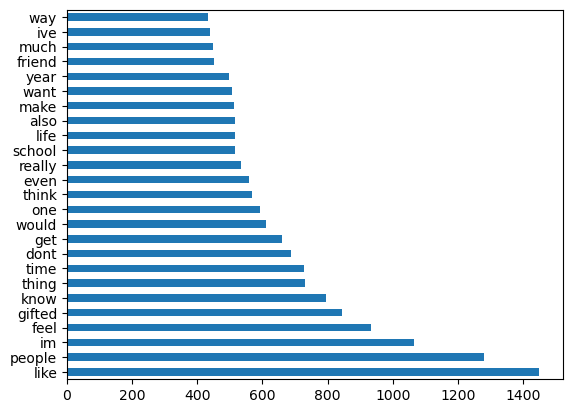

In [22]:
# create the base for your customised list of stopwords
stopwords_list = list(CountVectorizer(stop_words = 'english').get_stop_words())

In [23]:
# customise list of stopwords = sklearn's stopwords + top commonly occuring words derived from EDA
# overlapping stopwords from aspergers_df and gifted_df that have limited differentiating value
# remove giveaway words such as 'gifted', 'giftedness', 'aspergers', 'autism' that would 
# result in a biased model if included

additional_stopwords = ['way', 'ive', 'much', 'want', 'make', 'also', 
                        'really', 'even', 'one', 'would', 'get', 'dont', 
                        'thing', 'know', 'gifted', 'im', 'like', 'autism', 
                        'aspergers', 'giftedness']

In [24]:
len(stopwords_list)

318

In [25]:
len(additional_stopwords)

20

In [26]:
# add 17 out of 25 of the most commonly occuring words
# add 3 more giveaway stopwords 'autism', 'aspergers', 'giftedness'
for i in additional_stopwords:
    stopwords_list.append(i)

In [27]:
len(stopwords_list)

338

5. Examine different hyperparameters of Vectorizer: 
- `stop_words`
- `max_features`, `max_df`, `min_df`
- `ngram_range`

We are going to fit two types of models: a Logistic Regression and a Naive Bayes Classifier.

6. We want to attempt to fit our models on 16 combinations of hyperparameters using GridSearchCV:

|vectorizer|feature count|stop words|ngram_range|
|---|---|---|---|
|CountVectorizer|100|Customised list of stopwords|(1,3)|
|CountVectorizer|100|Customised list of stopwords|default| 
|CountVectorizer|100|English stopwords|(1,3)|
|CountVectorizer|100|English stopwords|default|
|CountVectorizer|500|Customised list of stopwords|(1,3)|
|CountVectorizer|500|Customised list of stopwords|default|
|CountVectorizer|500|English stopwords|(1,3)|
|CountVectorizer|500|English stopwords|default|
|TFIDFVectorizer|100|Customised list of stopwords|(1,3)|
|TFIDFVectorizer|100|Customised list of stopwords|default| 
|TFIDFVectorizer|100|English stopwords|(1,3)|
|TFIDFVectorizer|100|English stopwords|default|
|TFIDFVectorizer|500|Customised list of stopwords|(1,3)|
|TFIDFVectorizer|500|Customised list of stopwords|default|
|TFIDFVectorizer|500|English stopwords|(1,3)|
|TFIDFVectorizer|500|English stopwords|default|



7. Check to ensure classes are balanced. 

In [ ]:
# naive model that predicts majority class - gifted (50.3%)
y_test.value_counts(normalize=True)

0    0.503132
1    0.496868
Name: diagnosis, dtype: float64

The three most common types of Naive Bayes models include:
- `Bernoulli Naive Bayes`
- `Multinomial Naive Bayes`
- `Gaussian Naive Bayes`

8. Fit a Naive Bayes Classifier model and compare it to the baseline. We assume that all of our features are independent of one another.
- For features that were `CountVectorized`, the `MultinomialNB` classification model would be the most appropriate fit. We dont know that the features are going to be normally distributed and the features are not all going to be 0/1. This rules out both the GaussianNB and BernoulliNB classification models. Since the count vectorizer is taking a word count, the MultinomialNB classification model seems to be the best option.
- For features that were `TFIDFVectorized`, the `GaussianNB` classification model would be the most appropriate fit. Since a TFIDF normalizes the data, this would be best suited for a GaussianNB classification model.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [31]:
pipe1 = Pipeline([('cvec', CountVectorizer()),
                 ('mnb', MultinomialNB())])

In [32]:
pipe_params1 = {'cvec__max_features': [100, 500],
                'cvec__ngram_range': [(1,1), (1,3)],
                'cvec__stop_words':['english', stopwords_list]}

gs1 = GridSearchCV(pipe1, param_grid=pipe_params1, cv=3) 

gs1.fit(X_train, y_train)

print(gs1.best_score_)

gs1.best_params_

0.8467969939698873


{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [33]:
"""""
pipe2 = Pipeline([('tvec', TfidfVectorizer()),
                 ('gnb', GaussianNB())])
""""";

In [34]:
"""""
pipe_params2 = {'tvec__max_features': [100, 500],
                'tvec__ngram_range': [(1,1), (1,3)],
                'tvec__stop_words':['english', stopwords_list]}

gs2 = GridSearchCV(pipe4, param_grid=pipe_params2, cv=3)

gs2.fit(X_train, y_train)

print(gs2.best_score_)

gs2.best_params_
""""";

Comment: When using a pipeline that feeds from TfidfVectorizer() to GaussianNB() and I received an error stating "TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array." 

Reason: Sparse inputs are not implemented in GaussianNB as very sparse data almost certainly does not meet the assumptions of the algorithm. When the bulk of the values are zero, a simple Gaussian is not a good fit to the data, and will almost never lead to a useful classification.

9. Fit a logistic regression model and compare it to the baseline 
- A logistic regression is more informative. The logistic regression gives a measure of how relevant a predictor is (coefficient size) but also its direction of association (positive or negative).

In [35]:
pipe3 = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression())])

In [36]:
pipe_params3 = {'cvec__max_features': [100, 500],
                'cvec__ngram_range': [(1,1), (1,3)],
                'cvec__stop_words':['english', stopwords_list]}

gs3 = GridSearchCV(pipe3, param_grid=pipe_params3, cv=3)

gs3.fit(X_train, y_train)

print(gs3.best_score_)

gs3.best_params_

0.8238091910448023


{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 3),
 'cvec__stop_words': 'english'}

Comment: Word tokens are now stored as a bag-of-words. There are advantages and disadvantages to this approach when modeling. Advantages include efficiency in storage and modeling. On the other hand, bag-of-words models discard grammar, order, structure, and context. Hence we lose a decent amount of information.

In [37]:
pipe4 = Pipeline([('tvec', TfidfVectorizer()),
                 ('lr', LogisticRegression())])

In [38]:
pipe_params4 = {'tvec__max_features': [100, 500],
                'tvec__ngram_range': [(1,1), (1,3)],
                'tvec__stop_words':['english', stopwords_list]}

gs4 = GridSearchCV(pipe4, param_grid=pipe_params4, cv=3)

gs4.fit(X_train, y_train)

print(gs4.best_score_)

gs4.best_params_

0.8572441424049989


{'tvec__max_features': 500,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

Comment: The goal of TF-IDF is to minimize the impact of words that occur frequently in a certain set of words, and that may therefore be less informative than words that occur less often. The goal of cvec is to transform the lists of words into features that we can pass into a model. TfidfVectorizer() assigns a score for the term frequency while CountVectorizer() returns a count of the number of times a word appears.